In [80]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'x')

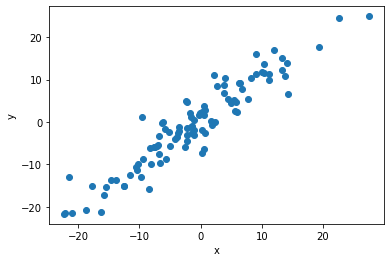

In [81]:
X = torch.randn(100, 1)*10
y = X + 3*torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

In [82]:
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [87]:
torch.manual_seed(100)
model = LR(1,1)
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[-0.7767]], requires_grad=True)
Parameter containing:
tensor([0.6317], requires_grad=True)


In [41]:
2 * -0.7767 + 0.6317

-0.9216999999999999

In [43]:
model(torch.tensor(2.0).unsqueeze(-1)) 

tensor([-0.9217], grad_fn=<AddBackward0>)

In [45]:
torch.tensor(2.0).shape

torch.Size([])

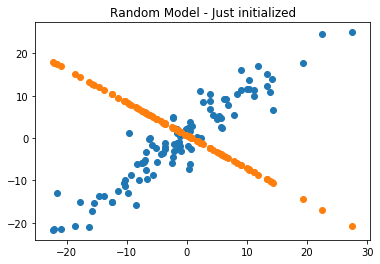

In [88]:
plt.scatter(X,y)
plt.scatter(X, model(X).detach().numpy())
_ = plt.title("Random Model - Just initialized")

In [48]:
# Train the model.

In [89]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [150]:
y_hat = model(X)
loss = mse(y_hat, y)
loss.backward()
lr = .01
print('before updating parameters')
for param in model.parameters():
    print(param)

before updating parameters
Parameter containing:
tensor([[-0.7767]], requires_grad=True)
Parameter containing:
tensor([0.6317], requires_grad=True)


In [151]:
with torch.no_grad():
    for param in model.parameters():
        param.sub_(lr * param.grad)
        param.grad.zero_()
        
print('after')
for param in model.parameters():
    print(param)

after
Parameter containing:
tensor([[2.6059]], requires_grad=True)
Parameter containing:
tensor([0.5846], requires_grad=True)


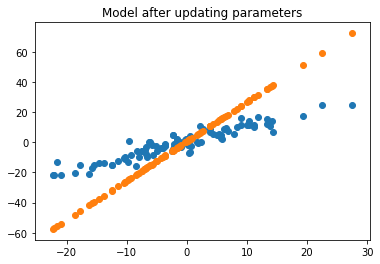

In [92]:
plt.scatter(X,y)
plt.scatter(X, model(X).detach().numpy())
_ = plt.title("Model after updating parameters")

## Putting this all together

In [153]:
class Linear_Model(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [137]:
def do_training(model, num_epochs = 100):
    losses = []
    for i in range(num_epochs):
        y_hat = model(X)
        loss = mse(y_hat, y)
        losses.append(loss)
        if i % 20 == 0: print(i, loss)
        with torch.no_grad():
            loss.backward()
            for param in model.parameters():
                param.sub_(lr * param.grad)
                param.grad.zero_()
    return(model, losses)

In [144]:
torch.manual_seed(100)
lm = Linear_Model(1,1)
lr = .01
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[-0.7767]], requires_grad=True)
Parameter containing:
tensor([0.6317], requires_grad=True)


In [145]:
epochs = 50
lm, losses = do_training(lm, epochs)

0 tensor(310.4407, grad_fn=<MeanBackward0>)
20 tensor(20.0292, grad_fn=<MeanBackward0>)
40 tensor(11.8304, grad_fn=<MeanBackward0>)


In [146]:
print(lr)

0.01


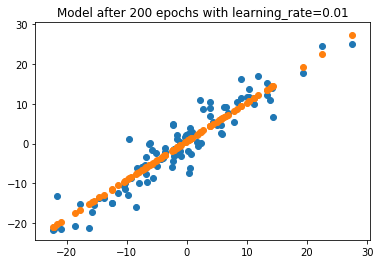

In [147]:
plt.scatter(X,y)
plt.scatter(X, lm(X).detach().numpy())
_ = plt.title(f"Model after 200 epochs with learning_rate={lr}")

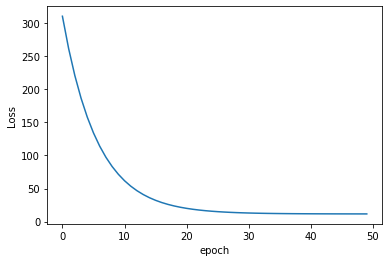

In [148]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
_ = plt.xlabel('epoch')

## Introducing Optimizer and Loss Functions

In [160]:
torch.manual_seed(100)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
lm = Linear_Model(1,1)

In [161]:
epochs = 50
losses = []
for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    if i % 20 == 0: print(i, loss)
    #print("epoch:", i, "loss:", loss.item())
    losses.append(loss)
    optimizer.zero_grad() # Note that torch.no_grad 
                         #and param.zero_grad is taken away
    loss.backward()
    optimizer.step()

0 tensor(11.5922, grad_fn=<MseLossBackward>)
20 tensor(11.5922, grad_fn=<MseLossBackward>)
40 tensor(11.5922, grad_fn=<MseLossBackward>)


### Gradient

In [169]:
x = torch.tensor(2., requires_grad = True)
y = x**3
y.backward()
print(x.grad)
# derivateive wrt x will be 3x**2 
# at x =2, derivative = 12

tensor(12.)


In [172]:
x = torch.tensor(2., requires_grad = True)
y = torch.tensor(4., requires_grad = True)
z = x**3 + 2*(y**2)
z.backward()
print(x.grad)
print(y.grad)
# derivateive wrt x will be 3x**2 
# at x =2, derivative = 12

tensor(12.)
tensor(16.)
